In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax;
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pandas as pd
%matplotlib inline
import scipy.special 
import random
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iris_data= pd.read_csv("/content/drive/MyDrive/Iris_Data.csv")

**Data Visualization**

In [ ]:
print(iris_data)
print(iris_data.shape)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
(150, 5)


In [ ]:
data = iris_data.drop_duplicates(subset ="species",)
print(data)

     sepal_length  sepal_width  petal_length  petal_width          species
0             5.1          3.5           1.4          0.2      Iris-setosa
50            7.0          3.2           4.7          1.4  Iris-versicolor
100           6.3          3.3           6.0          2.5   Iris-virginica


In [ ]:
iris_data.value_counts("species")

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

As seen above, the dataset has 3 classes (Iris setosa, Iris versicolor and Iris virginica) and each class has 4 features ( sepal_length, sepal_width, petal_length, sepal_width).The Iris dataset has 150 Iris samples. The first 50 of them are Iris setosa, the next 50 are Iris versicolor, and the last 50 are Iris virginica.

In [ ]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


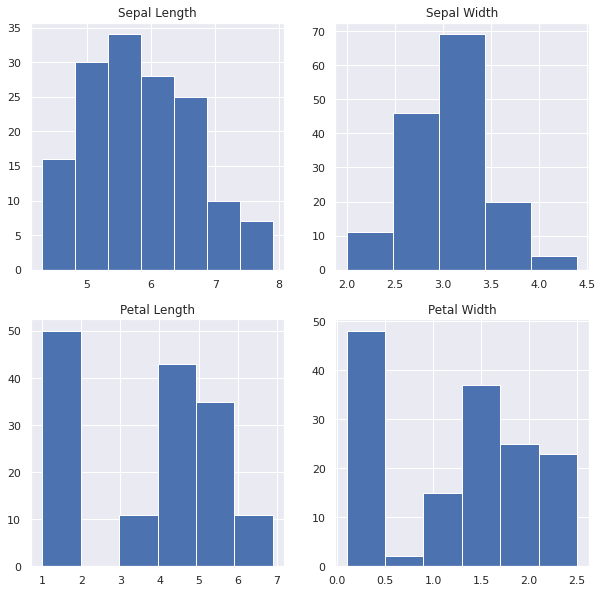

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
  
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(iris_data['sepal_length'], bins=7)
  
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(iris_data['sepal_width'], bins=5);
  
axes[1,0].set_title("Petal Length")
axes[1,0].hist(iris_data['petal_length'], bins=6);
  
axes[1,1].set_title("Petal Width")
axes[1,1].hist(iris_data['petal_width'], bins=6);

These charts give us the frequencies of the features.



*   The highest frequency of sepal length is between 5.5 and 6.0 which is around 35 and the lowest frequency of sepal length is between 7.5 to 8.0 which is around 7.
*   The highest frequency of sepal width is between 3.0 to 3.5 cm which is around 70 and lowest frequency of sepal width is between 4.0 to 4.5 cm which is around 5.

*   The highest frequency of petal length is between 1 to 2 which is around 50 and the lowest frequency of petal length is between 2 to 3 which is 0.
*   The highest frequency of petal width is between 0 to 0.5 which is around 50 and the lowest frequency of petal width is between 0.5 to 1 which is around 2.






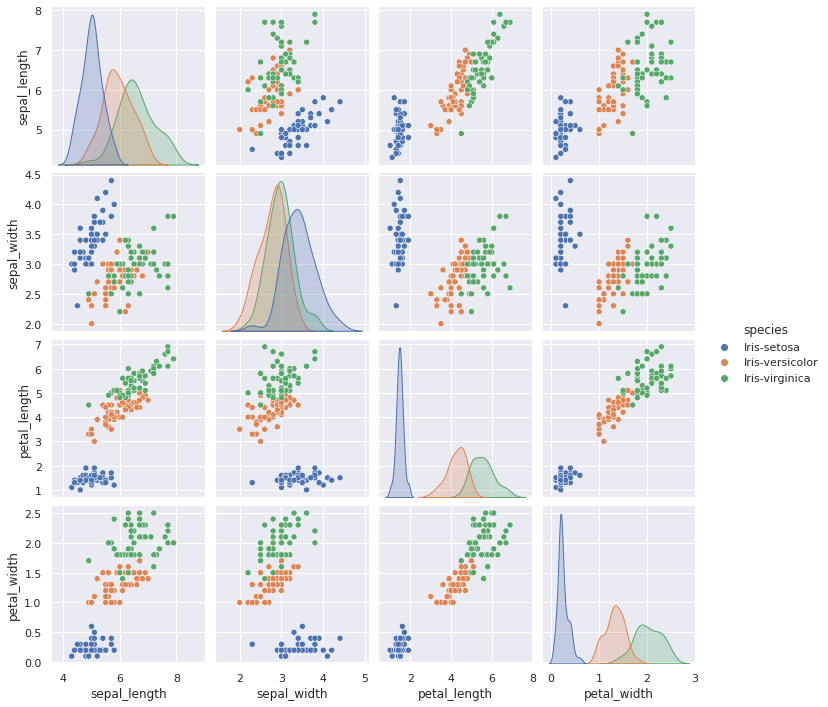

In [ ]:
sns.set()
sns.pairplot(iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']],
             hue="species",diag_kind="kde")

Looking at the plots above, it seems that Iris Setosa can be easily distinguished from the other two species with a single linear line, whereas a different method is needed to classify Iris versicolor and Iris virginica.

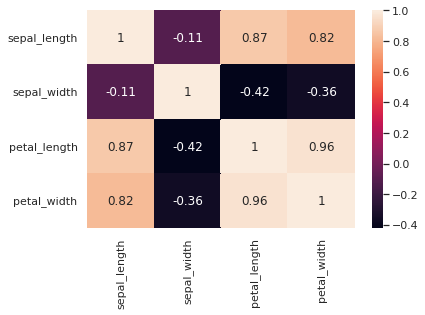

In [ ]:
sns.heatmap(iris_data.corr(), annot = True);

The graph above is the correlation table. Correlation shows how much the features are related to each other. The most related features are petal length and petal width

**Now it's time to arrange data and modeling**

In [ ]:
#Representing target names with numbers 0,1 and 2.

iris_data['species'] = iris_data['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})

#Converting target values to one-hot-encoded format manually

target = np.full((len(iris_data), 3),0.0001)
for i in range(len(iris_data)):
  target[i][iris_data['species'][i]] = 0.9999

data= iris_data.iloc[:,0:4]

# Splitting dataset to training data and testing data in the ratio of 0.2 test


A1,A2 = data[0:40],target[0:40]
tA1,tA2 = data[40:50],target[40:50]
B1,B2 = data[50:90],target[50:90]
tB1,tB2 = data[90:100],target[90:100]
C1,C2 = data[100:140],target[100:140]
tC1,tC2 = data[140:150],target[140:150]
data_train = np.concatenate((A1,B1,C1))
target_train= np.concatenate((A2,B2,C2))
data_test = np.concatenate((tA1,tB1,tC1))
target_test= np.concatenate((tA2,tB2,tC2))


data_train = np.array([i for i in data_train])
target_train = np.array([i for i in target_train])
data_test = np.array([i for i in data_test])
target_test = np.array([i for i in target_test])

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Species names are assigned as follows for convenience. Iris setosa: 0, Iris versicolor: 1, and Iris virginica: 2.

In [ ]:

class neuralNetwork:
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate): 
    self.inodes = inputnodes  #number of features
    self.hnodes = hiddennodes 
    self.onodes = outputnodes  #number of labels

    self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes)) 
    self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)) 


    self.lr = learningrate

    # activation function is the sigmoid function 
    self.activation_function = lambda x: scipy.special.expit(x) 

    pass


  # train the neural network 
  def train(self, data_train, target_train): 
    # convert inputs list to 2d array 
    inputs = np.array(data_train, ndmin=2).T 
    targets = np.array(target_train, ndmin=2).T 
 
    # calculate signals into hidden layer 
    hidden_inputs = np.dot(self.wih, inputs) 
    # calculate the signals emerging from hidden layer 
    hidden_outputs = self.activation_function(hidden_inputs) 
 
    # calculate signals into final output layer 
    final_inputs = np.dot(self.who, hidden_outputs) 
    # calculate the signals emerging from final output layer 
    final_outputs = self.activation_function(final_inputs)


    # output layer error is the (target - actual) 
    output_errors = targets - final_outputs 
    
    # hidden layer error is the output_errors, split by weights, recombined at hidden nodes 
    hidden_errors = np.dot(self.who.T, output_errors) 
 
    # update the weights for the links between the hidden and output layers 
    self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs)) 

 
    # update the weights for the links between the input and hidden layers 
    self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs)) 

 
    pass 


  # query the neural network 
  def query(self, data_train): 
    # convert inputs list to 2d array 
    inputs = np.array(data_train, ndmin=2).T 
 
    # calculate signals into hidden layer 
    hidden_inputs = np.dot(self.wih, inputs) 
    # calculate the signals emerging from hidden layer 
    hidden_outputs = self.activation_function(hidden_inputs) 


    # calculate signals into final output layer 
    final_inputs = np.dot(self.who, hidden_outputs) 
    # calculate the signals emerging from final output layer 
    final_outputs = self.activation_function(final_inputs) 
    

    return final_outputs 
  
  def eval(self,preds, y):
    pred= np.transpose(preds)
    ifcorrect =  np.argmax(pred, 1) == np.argmax(y, 1)
    correct_predictions = np.sum(ifcorrect)
    return correct_predictions * 100 / pred.shape[0]


  def predict(self,data_test,target_test):
    # convert inputs list to 2d array 
    test_inputs = np.array(data_test, ndmin=2).T 

    # calculate signals into hidden layer 
    hidden_input = np.dot(self.wih,test_inputs)
    # calculate the signals emerging from hidden layer 
    hidden = self.activation_function(hidden_input)

    # calculate signals into final output layer 
    scores = np.dot(self.who,hidden)
    # calculate the signals emerging from final output layer
    probs = self.activation_function(scores)

    global prediction
    prediction=np.transpose(probs)

    print('Accuracy of Multilayer Perceptron:', self.eval(probs, target_test),'%')


In [ ]:
# number of input, hidden and output nodes 
input_nodes = 4 #number of features
hidden_nodes = 6
output_nodes = 3 #number of class
# learning rate
learning_rate = 0.001 
# prediction for confusion matrix
prediction=[]
# create instance of neural network 
MyNN = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
MyNN.query(data_train)
epochs=2000
for i in range(epochs):
    MyNN.train(data_train,target_train)
MyNN.predict(data_test,target_test)

Accuracy of Multilayer Perceptron: 100.0 %


In [ ]:
print(confusion_matrix(np.argmax(target_test,1), np.argmax(prediction,1)))
print(precision_score(np.argmax(target_test,1), np.argmax(prediction,1),  average="micro"))
print(recall_score(np.argmax(target_test,1), np.argmax(prediction,1), average="micro"))
print(f1_score(np.argmax(target_test,1), np.argmax(prediction,1),average="micro"))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
1.0
1.0
1.0
